# TP 3 : Méthode Physic-Informed Neural Network

In [7]:
import torch

In [ ]:
def rejection_sampling(nb_data, phi, bounds=[[-1.0, 1.0], [-1.0, 1.0]]):
    data = []
    while len(data) < nb_data:
        x = torch.rand((nb_data, 2))
        x[:, 0] = x[:, 0] * (bounds[0][1] - bounds[0][0]) + bounds[0][0]
        x[:, 1] = x[:, 1] * (bounds[1][1] - bounds[1][0]) + bounds[1][0]
        mask = phi(x) < 0
        selected = x[mask]
        data.append(selected)
    data = torch.cat(data, dim=0)[:nb_data] 
    return data

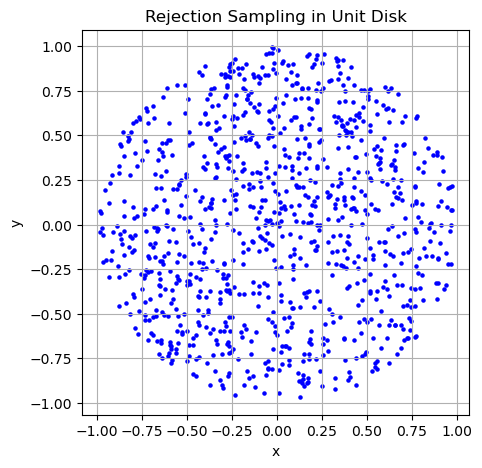

In [ ]:
import matplotlib.pyplot as plt

def phi_unit_disk(x):
    return x[:, 0]**2 + x[:, 1]**2 - 1.0

def test_rejection_sampling():
    x = rejection_sampling(1000, phi_unit_disk)
    x = x.detach().numpy()
    plt.figure(figsize=(5, 5))
    plt.scatter(x[:, 0], x[:, 1], s=5, c='blue')
    plt.title("Rejection Sampling in Unit Disk")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

test_rejection_sampling()

In [ ]:
def make_collocation_points(nb_collocation, phi, mu_range=[0.1, 1.0], bounds=[[-1.0, 1.0], [-1.0, 1.0]]):
    x_collocation = rejection_sampling(nb_collocation, phi, bounds=bounds)
    
    mu_collocation = torch.rand((nb_collocation, 1), dtype=torch.double)
    mu_collocation = mu_collocation * (mu_range[1] - mu_range[0]) + mu_range[0]

    return x_collocation, mu_collocation